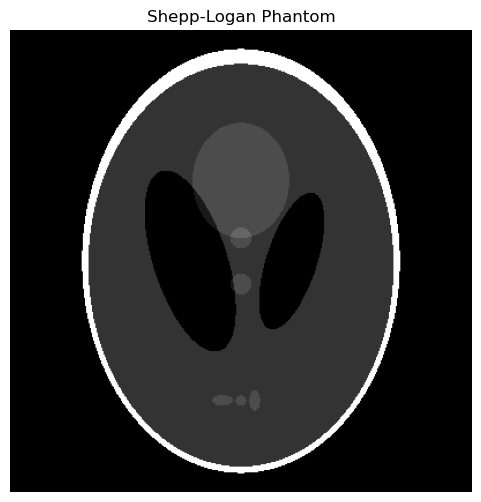

In [29]:
# Shepp Logan Phantom

import numpy as np
import matplotlib.pyplot as plt
from skimage.data import shepp_logan_phantom

# Generate the Shepp-Logan phantom image
image = shepp_logan_phantom()

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.axis('off')  # Remove axes for better visualization
plt.title('Shepp-Logan Phantom')
plt.show()


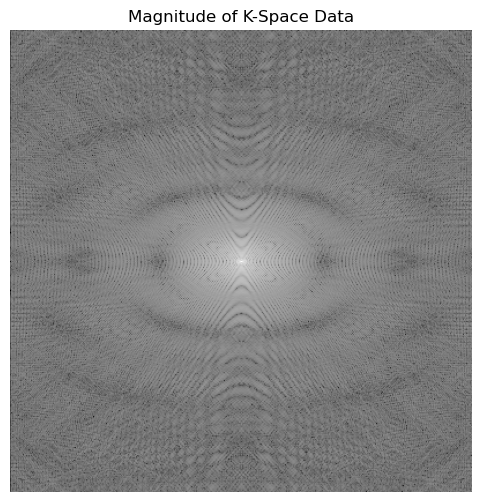

In [30]:
from numpy.fft import fftshift, ifftshift, fftn, ifftn

# Compute the 2D Fourier Transform to get the k-space data
k_space_data = fftn(ifftshift(image))
k_space_data_shifted = fftshift(k_space_data)  # Shift the zero frequency component to the center

# Display the magnitude of the k-space data
plt.figure(figsize=(6, 6))
plt.imshow(np.log(np.abs(k_space_data_shifted)), cmap='gray')
plt.axis('off')
plt.title('Magnitude of K-Space Data')
plt.show()


In [31]:
def apply_b0_inhomogeneity(k_space, b0_field_map):
    """
    Simulates the effect of B0 inhomogeneity on the k-space data.
    B0 inhomogeneity causes phase distortions in the image, which can be simulated
    by applying a phase shift in the k-space data.

    Parameters:
    - k_space: The k-space data of the image.
    - b0_field_map: A map of the B0 field inhomogeneity, which will be used to
      generate the phase shift. It should be the same size as the k_space data.

    Returns:
    - k_space_distorted: The k-space data after applying the B0 inhomogeneity.
    """
    # Generate a phase shift based on the B0 inhomogeneity map
    phase_shift = np.exp(1j * b0_field_map)
    
    # Apply the phase shift to the k-space data
    k_space_distorted = k_space * phase_shift
    
    return k_space_distorted

# Create a simple B0 field inhomogeneity map
# Here we simulate a linear gradient across the image for simplicity


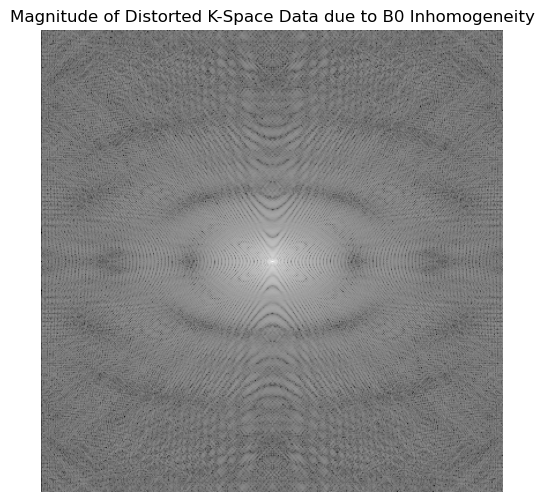

In [32]:
x, y = np.meshgrid(np.linspace(-1, 1, image.shape[1]), np.linspace(-1, 1, image.shape[0]))
b0_field_map = np.sin(x * np.pi)  # A simple sinusoidal variation

# Apply the B0 inhomogeneity to the k-space data
k_space_distorted = apply_b0_inhomogeneity(k_space_data, b0_field_map)

# Display the magnitude of the distorted k-space data
plt.figure(figsize=(6, 6))
plt.imshow(np.log(np.abs(fftshift(k_space_distorted))), cmap='gray')
plt.axis('off')
plt.title('Magnitude of Distorted K-Space Data due to B0 Inhomogeneity')
plt.show()

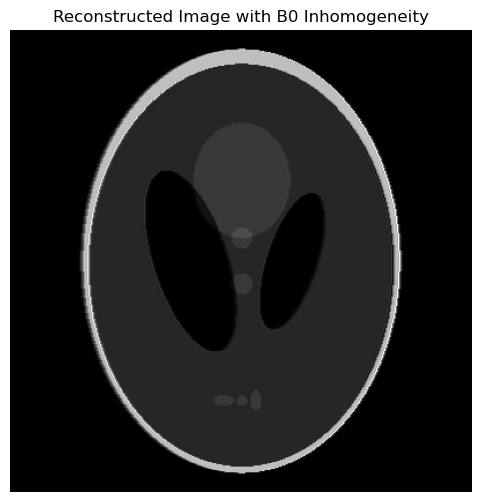

In [33]:
# Reconstruct the image from the distorted k-space data
image_reconstructed = fftshift(ifftn(k_space_distorted))

# Display the reconstructed image
plt.figure(figsize=(6, 6))
plt.imshow(np.abs(image_reconstructed), cmap='gray')
plt.axis('off')
plt.title('Reconstructed Image with B0 Inhomogeneity')
plt.show()

